# DSGE Model with Financial Frictions and Countercyclical Capital Buffer

## Model Overview

This is a small open economy DSGE model featuring:
- **Gertler-Kiyotaki financial accelerator mechanism**
- **Countercyclical Capital Buffer (CCyB) regulation**
- **CES production function** with capital, labor, and oil
- **Endogenous leverage** and credit spreads
- **Open economy features** with net foreign assets

---

## Production Sector

### CES Aggregation

The production technology combines three inputs using a CES function:

$$
Y_t = A \exp(a_t) \hat{Y}_t
$$

where:
$$
Y_{marg,t} = \alpha_K K_{t-1}^\rho + \alpha_L L_t^\rho + \alpha_O \text{Oil}_t^\rho
$$

$$
\hat{Y}_t = Y_{marg,t}^{1/\rho}
$$

**Parameters:**
- $\alpha_K = 0.35$: capital share
- $\alpha_L = 0.60$: labor share
- $\alpha_O = 0.05$: oil share
- $\rho = -0.1$: elasticity of substitution parameter
- $a_t$: TFP shock following AR(1) process

### Marginal Products

$$
MPK_t = A \exp(a_t) Y_{marg,t}^{1/\rho - 1} \alpha_K K_{t-1}^{\rho - 1}
$$

$$
MPL_t = A \exp(a_t) Y_{marg,t}^{1/\rho - 1} \alpha_L L_t^{\rho - 1}
$$

$$
MPO_t = A \exp(a_t) Y_{marg,t}^{1/\rho - 1} \alpha_O \text{Oil}_t^{\rho - 1}
$$

### Technology Shock

$$
a_t = \rho_a a_{t-1} + \varepsilon_t^a, \quad \rho_a = 0.9
$$

---

## Capital Accumulation

### Law of Motion

$$
K_t = (1 - \delta)K_{t-1} + I_t
$$

where $\delta = 0.04$ is the depreciation rate.

### Investment with Adjustment Costs

Following Tobin's Q theory:

$$
I_t = \delta K_{t-1} + (Q_t - 1) \frac{K_{t-1}}{\Phi}
$$

where $Q_t$ is the shadow value of capital and $\Phi = 10$ is the adjustment cost parameter.

### Total Adjustment Cost

$$
C_{K,t} = \frac{\Phi}{2} \left(\frac{I_t - \delta K_{t-1}}{K_{t-1}}\right)^2 - \Phi \left(\frac{I_t - \delta K_{t-1}}{K_{t-1}}\right) \frac{I_t}{K_{t-1}}
$$

This represents the resources lost due to adjustment frictions in the capital installation process.

---

## Household Sector

### Utility and Consumption

Marginal utility of consumption:

$$
\Lambda_t = \frac{C_t^{-\sigma_c}}{1 + \tau_c}
$$

where:
- $\sigma_c = 2$: coefficient of relative risk aversion
- $\tau_c = 0.10$: consumption tax rate

### Euler Equation

$$
\Lambda_t = \beta (1 + r_t) \Lambda_{t+1}
$$

where $\beta$ is determined endogenously from steady-state conditions.

### Interest Rate (UIP Condition)

$$
r_t = r_{ss} - \Phi_B \cdot NFA_{t-1}
$$

The domestic interest rate deviates from the steady state based on the net foreign asset position. Parameter $\Phi_B = 0.001$ governs the elasticity.

### Labor Supply

$$
L_t = \left(\frac{W_t (1-\tau_w) \Lambda_t}{\gamma}\right)^{\phi_L}
$$

where:
- $\tau_w = 0.25$: wage tax rate
- $\phi_L = 0.5$: Frisch elasticity of labor supply
- $\gamma$: scaling parameter calibrated in steady state

---

## Financial Sector: Gertler-Kiyotaki Framework

### Balance Sheet Constraint

Financial intermediaries invest in capital using equity (net worth) and debt:

$$
Q_t K_t = N_t + D_t
$$

where:
- $Q_t K_t$: market value of capital holdings
- $N_t$: bank equity (net worth)
- $D_t$: deposits/debt

### Net Worth Accumulation

$$
N_t = \theta_N \left(R_{K,t} Q_{t-1} K_{t-1} - (1 + r_{t-1}) D_{t-1}\right) + (1 - \theta_N) \bar{N}
$$

**Components:**
- $\theta_N = 0.972$: survival rate of bankers
- First term: retained earnings from continuing bankers
- Second term: transfers to new bankers
- $\bar{N}$: steady-state transfer to maintain bank equity

### Return on Capital

$$
R_{K,t} = \frac{(1-\delta)Q_t + MPK_t - C_{K,t}}{Q_{t-1}}
$$

This is the gross return on capital held by banks, net of adjustment costs.

### Leverage Constraint

The key moral hazard friction:

$$
N_t = \frac{\theta}{\nu_t} Q_t K_t
$$

where:
- $\theta = 0.381$: fraction of assets bankers can divert
- $\nu_t$: endogenous leverage multiplier (shadow value)

**Interpretation:** Banks can only lever up to the point where they don't find it optimal to divert assets rather than repay depositors.

### Incentive Compatibility Condition

$$
\frac{(1-\delta)Q_{t+1} + MPK_{t+1} - C_{K,t+1}}{Q_t} = \nu_t (1 + r_t)
$$

This ensures that banks' expected return equals the leveraged cost of funds, incorporating the agency friction through $\nu_t$.

---

## Countercyclical Capital Buffer (CCyB)

### Credit Deviation

The regulatory authority monitors credit relative to its steady-state level:

$$
\text{credit\_dev}_t = \log(Q_{t-1} K_{t-1}) - \log(\text{credit}_{ss})
$$

Note: Uses $t-1$ values (predetermined) to avoid forward-looking regulatory policy.

### Leverage Ratio

$$
\text{leverage}_t = \frac{Q_t K_t}{N_t}
$$

Steady-state leverage: $\frac{\bar{K}}{\bar{N}}$

### Spread with CCyB Penalty

$$
\text{spr}_t = \log(\nu_t) + \chi_{reg} \cdot \phi_\kappa \cdot \text{credit\_dev}_t \cdot \left(\text{leverage}_t - \frac{\bar{K}}{\bar{N}}\right)^2
$$

**Components:**
1. $\log(\nu_t)$: baseline GK spread from moral hazard
2. CCyB penalty term (second component)

**Parameters:**
- $\chi_{reg} = 0.05$: regulatory intensity
  - Set to 0 to completely disable CCyB
- $\phi_\kappa = 0.3$: sensitivity to credit deviation
  - Set to 0 for pure GK model without CCyB

**Mechanism:**
- When credit expands above trend ($\text{credit\_dev}_t > 0$) AND leverage is high, the penalty increases
- This raises the effective cost of leverage, dampening the credit boom
- The quadratic term in leverage deviation ensures the penalty is symmetric but convex

---

## Current Account

### Net Foreign Assets Evolution

$$
\begin{align}
NFA_t = &(1 + r_t) NFA_{t-1} + Y_t - (1+\tau_c)C_t - I_t \\
        &- P_{oil} \cdot \text{Oil}_t - \tau_w W_t L_t - \tau_k MPK_t K_{t-1}
\end{align}
$$

**Components:**
- $(1 + r_t) NFA_{t-1}$: interest on previous position
- $Y_t$: GDP (income)
- $(1+\tau_c)C_t$: consumption expenditure with tax
- $I_t$: investment expenditure
- $P_{oil} \cdot \text{Oil}_t$: oil import bill
- $\tau_w W_t L_t$: wage tax revenue
- $\tau_k MPK_t K_{t-1}$: capital income tax revenue

---

## Calibration Summary

### Production Parameters

| Parameter | Value | Description |
|-----------|-------|-------------|
| $\delta$ | 0.04 | Depreciation rate (quarterly) |
| $\Phi$ | 10 | Adjustment cost parameter |
| $\alpha_K$ | 0.35 | Capital share in CES |
| $\alpha_L$ | 0.60 | Labor share in CES |
| $\alpha_O$ | 0.05 | Oil share in CES |
| $\rho$ | -0.1 | CES substitution parameter |
| $\bar{K}$ | 3.71 | Steady-state capital |
| $\bar{L}$ | 0.33 | Steady-state labor |
| $\bar{O}$ | 0.05 | Steady-state oil |

### Tax Parameters

| Parameter | Value | Description |
|-----------|-------|-------------|
| $\tau_c$ | 0.10 | Consumption tax |
| $\tau_w$ | 0.25 | Wage income tax |
| $\tau_k$ | 0.15 | Capital income tax |

### Preference Parameters

| Parameter | Value | Description |
|-----------|-------|-------------|
| $\sigma_c$ | 2.0 | Relative risk aversion |
| $\phi_L$ | 0.5 | Frisch elasticity of labor |
| $\Phi_B$ | 0.001 | Foreign debt elasticity |
| $\rho_a$ | 0.9 | TFP shock persistence |

### Financial Parameters

| Parameter | Value | Description |
|-----------|-------|-------------|
| $\theta_N$ | 0.972 | Banker survival rate |
| $\theta$ | 0.381 | Divertable fraction |
| $\phi_\kappa$ | 0.3 | CCyB sensitivity |
| $\chi_{reg}$ | 0.05 | Regulatory intensity |

### Endogenous Steady-State Values

$$
\beta = \frac{1}{MPK_{ss} + 1 - \delta}
$$

$$
\nu_{ss} = \frac{MPK_{ss} + 1 - \delta}{1 + r_{ss}}
$$

$$
N_{ss} = \frac{\theta}{\nu_{ss}} \bar{K}
$$

$$
D_{ss} = \bar{K} - N_{ss}
$$

---

## Model Variables

### Endogenous Variables (16)

1. $c$: consumption
2. $k$: capital stock
3. $y$: output
4. $\text{oil}$: oil input
5. $i$: investment
6. $q$: Tobin's Q
7. $\hat{y}$: CES aggregate
8. $mpk$: marginal product of capital
9. $mp_{\text{oil}}$: marginal product of oil
10. $l$: labor
11. $w$: wage
12. $C_k$: adjustment cost
13. $r$: interest rate
14. $nfa$: net foreign assets
15. $a$: TFP shock
16. $\lambda$: marginal utility
17. $D$: bank debt
18. $N$: bank net worth
19. $R_k$: return on capital
20. $\text{spr}$: credit spread
21. $\nu$: leverage multiplier
22. $\text{leverage}$: leverage ratio
23. $\text{credit\_dev}$: credit deviation

### Exogenous Shocks (1)

- $\varepsilon^a$: TFP shock innovation

---

## Steady State

All variables are at their steady-state values with:
- Output normalized: $Y_{ss} = 1$
- No adjustment costs: $C_{K,ss} = 0$
- Tobin's Q at unity: $Q_{ss} = 1$
- Zero TFP shock: $a_{ss} = 0$
- Balanced current account: $NFA_{ss} = 0$
- Credit at trend: $\text{credit\_dev}_{ss} = 0$

Financial steady state:
- Spread: $\text{spr}_{ss} = \log(\nu_{ss})$
- Leverage: $\text{leverage}_{ss} = \bar{K}/\bar{N}$
- Net worth accumulation balances with banker exit/entry

---

## Key Mechanisms

### 1. Financial Accelerator

**Normal Times:**
- Banks have sufficient net worth
- Leverage constraint not too binding
- Spreads relatively low

**After Negative Shock:**
- Asset prices fall → bank net worth declines
- Leverage constraint tightens
- Spreads widen → investment falls
- Amplifies initial shock through financial channel

### 2. CCyB Regulation

**Credit Boom:**
- $\text{credit\_dev}_t > 0$ (credit above trend)
- High leverage magnifies penalty
- Spreads rise → dampens boom
- "Leans against the wind"

**Credit Bust:**
- $\text{credit\_dev}_t < 0$ (credit below trend)
- Penalty term negative → reduces spreads
- Supports recovery
- Countercyclical stabilization

### 3. Open Economy Channel

**Current Account:**
- Negative shock → output falls
- Imports (especially oil) may also fall
- NFA position affects interest rate
- International borrowing/lending smooths consumption

---

## Model Solution (Dynare)

The model is solved using first-order perturbation around the steady state. Key features:

- **Method:** Log-linearization (Dynare default)
- **Solution:** Policy functions for each variable
- **IRFs:** Impulse responses to TFP shock
- **Moments:** Theoretical standard deviations and correlations

### Turning CCyB On/Off

**No CCyB (pure GK model):**
```matlab
chi_reg = 0;    % Completely disable
```

**Moderate CCyB:**
```matlab
chi_reg = 0.05;
phi_kappa = 0.3;
```

**Strong CCyB:**
```matlab
chi_reg = 0.15;
phi_kappa = 0.5;
```

---

## Extensions and Variations

### Possible Extensions:

1. **Additional shocks:**
   - Oil price shocks
   - Risk premium shocks
   - Financial shocks to $\theta$ or $\theta_N$

2. **Monetary policy:**
   - Taylor rule for interest rate
   - Interaction with CCyB

3. **Heterogeneous banks:**
   - Different leverage constraints
   - Bank size distribution

4. **Time-varying CCyB:**
   - State-dependent regulatory policy
   - Asymmetric activation/deactivation

5. **Multiple assets:**
   - Housing and business capital
   - Differentiated credit markets

---

## References

**Key Papers:**

1. Gertler, M., & Kiyotaki, N. (2010). "Financial Intermediation and Credit Policy in Business Cycle Analysis." *Handbook of Monetary Economics*, 3, 547-599.

2. Gertler, M., & Karadi, P. (2011). "A Model of Unconventional Monetary Policy." *Journal of Monetary Economics*, 58(1), 17-34.

3. Basel Committee on Banking Supervision (2010). "Guidance for National Authorities Operating the Countercyclical Capital Buffer."

4. Drehmann, M., Borio, C., & Tsatsaronis, K. (2012). "Characterising the Financial Cycle: Don't Lose Sight of the Medium Term!" *BIS Working Papers*, No. 380.

---

## Implementation Notes

### File Structure:
- Main model file: `soe_gk_ccyb.mod`
- Solution: First-order approximation
- Steady state: Solved analytically

### Key Checks:
1. Blanchard-Kahn conditions satisfied
2. Steady-state residuals near zero
3. IRFs are stable and decay
4. Model statistics match targets

### Computational Tips:
- Use `steady` command to verify steady state
- Check `resid` to see equation residuals
- Compare IRFs with and without CCyB
- Sensitivity analysis on $\chi_{reg}$ and $\phi_\kappa$

In [1]:
x = 1

1

In [1]:
using Pkg
#Pkg.add("Dynare")
using Dynare
# Redefine display_graphs to do nothing and avoid error
function Dynare.display_graphs(filepath::String)
    println("Skipping display of $filepath")
end

In [2]:
using Random
Random.seed!(1906)
context = @dynare "GK_CCyB_test_baseline.mod"
using Plots, DataFrames

Dynare version: 0.10.3
2025-12-17T09:27:04.814: Starting @dynare GK_CCyB_test_baseline.mod
["GK_CCyB_test_baseline.mod", "language=julia", "json=compute", "notmpterms"]
Dynare preprocessor version: 7.0.0+0


Starting preprocessing of the model file ...
Found 26 equation(s).
Evaluating expressions...
Computing static model derivatives (order 1).
Normalizing the static model...
Finding the optimal block decomposition of the static model...
4 block(s) found:
  3 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 22 equation(s)
                                 and 22 feedback variable(s).
Computing dynamic model derivatives (order 1).
Normalizing the dynamic model...
Finding the optimal block decomposition of the dynamic model...
4 block(s) found:
  3 recursive block(s) and 1 simultaneous block(s).
  the largest simultaneous block has 22 equation(s)
                                 and 17 feedback variable(s).
JSON written after Computing step.
Preprocessing completed.


2025-12-17T09:27:04.961: End of preprocessing
2025-12-17T09:27:04.990: Start parse_statements!


  Steady state



────────────┬──────────
     c      │ 0.529595
          k │     3.71
          y │      1.0
        oil │     0.05
          i │   0.1484
          q │      1.0
       yhat │   0.6451
        mpk │   0.0792
      mpoil │   1.2914
          l │     0.33
          w │   1.9442
         Ck │      0.0
          r │   0.0392
        nfa │      0.0
          a │      0.0
     lambda │   3.2413
      ymarg │   1.0448
          D │   2.2223
          N │   1.4135
         Rk │   1.0392
        spr │      0.0
         nu │      1.0
   leverage │   2.6247
       phi1 │     0.02
         KB │   0.0742
 credit_gap │      0.0
────────────┴──────────

  Coefficients of approximate solution function (reduced form)



─────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         │   c_t      k_t      y_t     oil_t     i_t      q_t     yhat_t    mpk_t   mpoil_t      l_t      w_t     Ck_t     r_t    nfa_t   a_t  lambda_t  ymarg_t      D_t       N_t      Rk_t     spr_t      nu_t  leverage_t  phi1_t     KB_t  credit_gap_t
─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    ϕ(k) │   0.022   1.9304   0.0876   0.0044   0.9704    2.5078   0.0565  -0.0158      0.0   0.0014   0.1782  -0.1003    -0.0  -0.9311   0.0   -0.2693  -0.0092   1.0033    9.9963    2.4919   -4.0439   -4.0439    -10.6138  0.0027   0.2347 

2025-12-17T09:27:06.882: End parse_statements!
2025-12-17T09:27:06.882: End parser


Skipping display of GK_CCyB_test_baseline


In [3]:
simdata = (context.results.model_results[1].simulations[1].data)
irfdata = context.results.model_results[1].irfs
#irf_df = DataFrame(context.results.model_results[1].irfs)
simdata = DataFrame(simdata)




Row,c,k,y,oil,i,q,yhat,mpk,mpoil,l,w,Ck,r,nfa,a,lambda,ymarg,D,N,Rk,spr,nu,leverage,phi1,KB,credit_gap
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.529595,3.71,1.0,0.05,0.1484,1.0,0.645125,0.0791993,1.29142,0.33,1.94424,0.0,0.0391993,0.0,0.0,3.2413,1.04481,2.22229,1.41351,1.0392,0.0,1.0,2.62467,0.02,0.0742,0.0
2,0.528322,3.67496,0.990803,0.0495752,0.113359,0.90555,0.644165,0.0784591,1.29142,0.329517,1.9292,0.00377802,0.0391993,0.0296808,-0.00770914,3.25688,1.04496,2.18782,1.07024,0.944009,0.138953,1.13895,2.98938,0.02,0.066491,7.98626e-18
3,0.528354,3.69306,0.988172,0.0494393,0.165097,1.04878,0.641846,0.0790451,1.29142,0.329186,1.92553,-0.00195132,0.0391696,0.00685047,-0.00674533,3.25649,1.04534,2.21212,1.5883,1.18598,-0.07944,0.92056,2.41617,0.018961,0.0736263,-0.103896
4,0.528214,3.67769,0.990174,0.04954,0.132357,0.958585,0.643221,0.0787955,1.29142,0.329478,1.92795,0.0016566,0.0391924,0.0174738,-0.00687501,3.25821,1.04511,2.19599,1.25593,0.946685,0.0613559,1.06136,2.78571,0.0204422,0.0721213,0.0442164
5,0.526526,3.63903,0.977228,0.0489359,0.108449,0.895799,0.641009,0.0781038,1.29142,0.328742,1.90688,0.00416804,0.0391818,0.0447745,-0.0163928,3.27886,1.04547,2.16151,1.02775,0.976941,0.149583,1.14958,3.01728,0.0194988,0.0631894,-0.0501231
6,0.524854,3.61076,0.963114,0.0482687,0.11729,0.923798,0.637361,0.077849,1.29142,0.327851,1.88411,0.00304809,0.0391545,0.0558038,-0.0248521,3.29933,1.04606,2.14247,1.12359,1.06993,0.102154,1.10215,2.89279,0.0187667,0.0619855,-0.123329
7,0.524718,3.61756,0.962477,0.048229,0.151229,1.01832,0.635836,0.0784438,1.29142,0.327813,1.88266,-0.000732991,0.0391435,0.0330345,-0.0231245,3.301,1.04631,2.15831,1.45735,1.13596,-0.0376036,0.962396,2.52597,0.0189705,0.0698914,-0.102951
8,0.525576,3.63436,0.972741,0.0487076,0.161497,1.04527,0.637555,0.0791181,1.29142,0.328589,1.89811,-0.00181072,0.0391662,0.00569833,-0.0155255,3.29049,1.04603,2.17866,1.54783,1.06534,-0.0701505,0.929849,2.44055,0.0199341,0.0758015,-0.00659132
9,0.524613,3.59851,0.969865,0.048583,0.109529,0.903383,0.638429,0.0785067,1.29142,0.328685,1.89216,0.00386467,0.0391936,0.0281877,-0.0197569,3.30229,1.04589,2.14401,1.03033,0.894847,0.144416,1.14442,3.00372,0.0202488,0.0657242,0.0248786


In [4]:
println(typeof(irfdata))
println(fieldnames(typeof(irfdata)))

Dict{Symbol, AxisArrayTables.AxisArrayTable}
(:slots, :keys, :vals, :ndel, :count, :age, :idxfloor, :maxprobe)


In [5]:
# List all shocks (keys in the dictionary)
shock_names = keys(irfdata)
println("Available shocks:")
for shock in shock_names
    println(shock)
end

Available shocks:
eps_a


In [6]:
shock_name = :eps_a  # or whatever it is from the list
irf_table = irfdata[shock_name]

# Convert to DataFrame for easier plotting
irf_df = DataFrame(irf_table)

# See what variables responded to this shock
names(irf_df)

26-element Vector{String}:
 "c"
 "k"
 "y"
 "oil"
 "i"
 "q"
 "yhat"
 "mpk"
 "mpoil"
 "l"
 "w"
 "Ck"
 "r"
 "nfa"
 "a"
 "lambda"
 "ymarg"
 "D"
 "N"
 "Rk"
 "spr"
 "nu"
 "leverage"
 "phi1"
 "KB"
 "credit_gap"

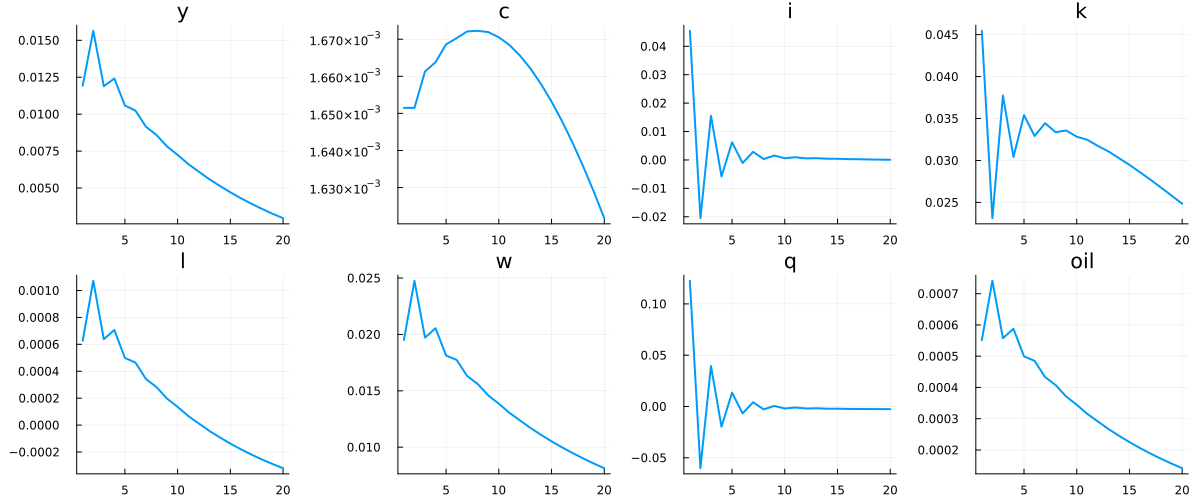

In [7]:
# Pick the most important ones
key_vars = ["y", "c", "i", "k", "l", "w", "q", "oil"]

plots_array = []
for var in key_vars
    p = plot(irf_df[!, var], 
            title=var,
            label="",
            linewidth=2)
         #   xlabel="Periods")
    push!(plots_array, p)
end

plot(plots_array..., 
     layout=(2, 4), 
     size=(1200, 500))

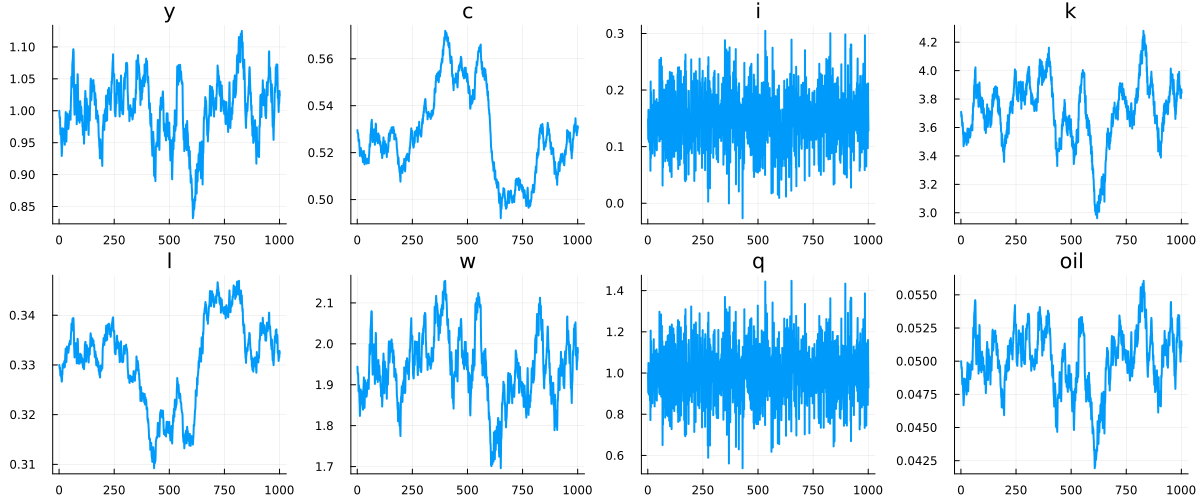

In [8]:
 # If there's a time/period column
if "periods" in names(simdata) || :periods in names(simdata)
    time = simdata.periods
    
    plots_array = []
    for var in key_vars
        p = plot(time, simdata[!, var], 
                title=string(var),
                label="",
                linewidth=2,
                xlabel="Periods")
        push!(plots_array, p)
    end
else
    # Use row indices as time
    plots_array = []
    for var in key_vars
        p = plot(1:nrow(simdata), simdata[!, var], 
                title=string(var),
                label="",
                linewidth=2)
          
        push!(plots_array, p)
    end
end

plot(plots_array..., layout=(2, 4), size=(1200, 500))

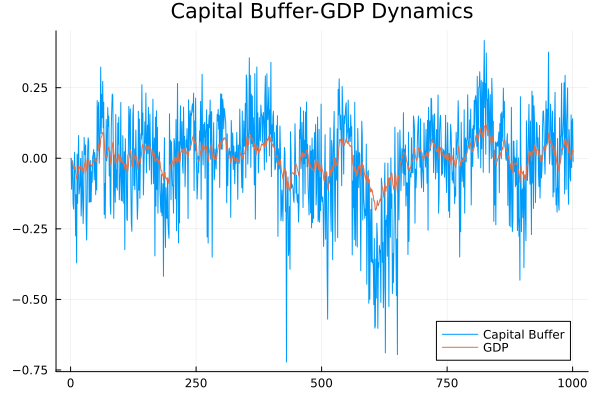

In [13]:
KB = simdata.KB
y = simdata.y
time1 = 1:nrow(simdata)
plot(time1, log.(KB/KB[1]), label = "Capital Buffer", title = "Capital Buffer-GDP Dynamics")
plot!(time1, log.(y), label = "GDP")

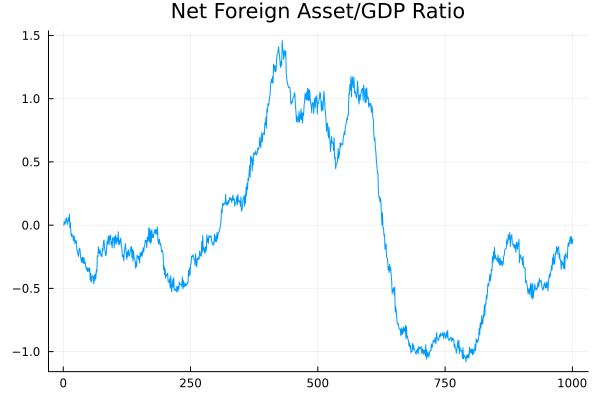

In [14]:
y = simdata.y

nfa = simdata.nfa
q = simdata.q

plot(time1, nfa./y, label = false, title = "Net Foreign Asset/GDP Ratio")


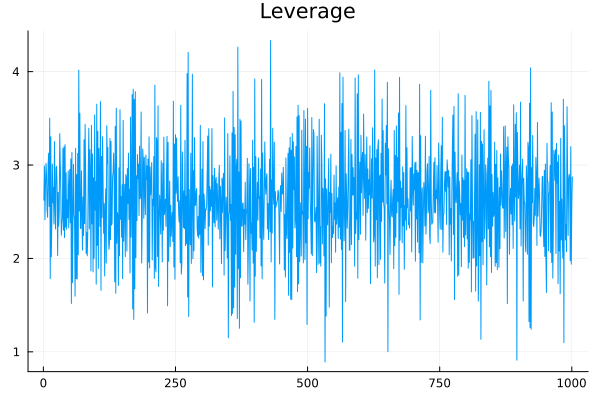

In [15]:
leverage = simdata.leverage

plot(time1, leverage, label = false, title = "Leverage")


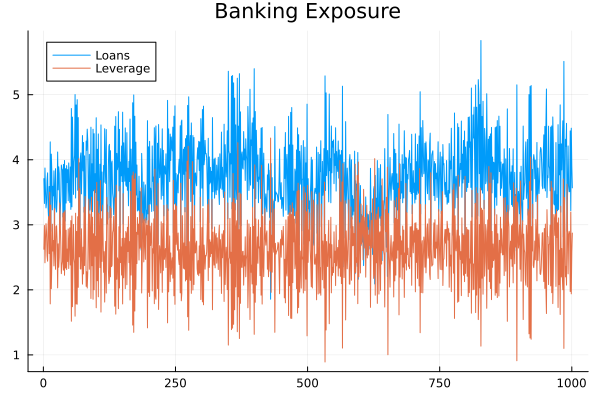

In [16]:
k = simdata.k
k1 = q .* k
plot(time1, k1, label = "Loans", title = "Banking Exposure")
plot!(time1, leverage, label = "Leverage", title = "Banking Exposure")



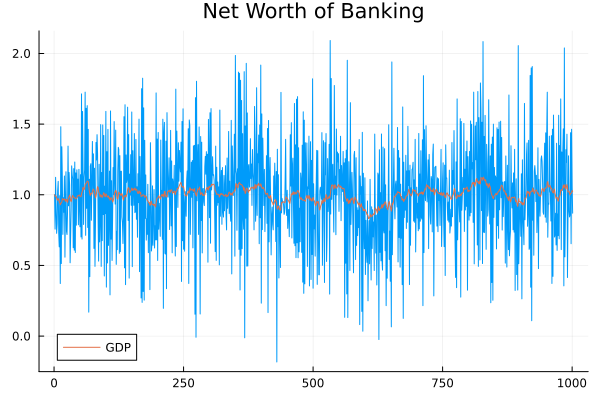

In [17]:
n = simdata.N
plot(time1, n/n[1], label = false, title = "Net Worth of Banking")
plot!(time1, y/y[1], label = "GDP")